Integrantes
- Paulina Muñoz
- Jerónimo Bedoya


# Tarea

1. Cargue el archivo 'california_housing_train', que está en la carpeta 'sample_data' de Colab.
Alguna información sobre este dataset puede ser obtenida aquí: https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [ ]:
df = pd.read_csv('/content/sample_data/california_housing_train.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


2. Vamos a usar como variable predictora 'median_income'. Haga un gráfico de dispersión de 'median_house_value' versus 'median_income' y analícelo.

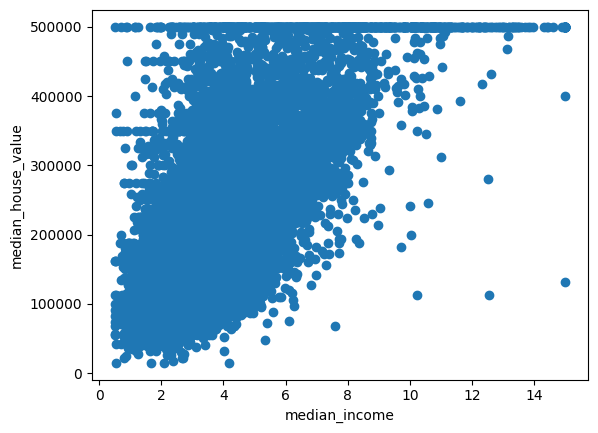

In [ ]:
X = df[['median_income']].copy()
y = df['median_house_value'].copy()
plt.plot(X, y, 'o')
plt.xlabel('median_income')
plt.ylabel('median_house_value');

Según el gráfico de dispersión anterior podemos decir que hay una gran cantidad de datos concentrados con una tendencia que a simple vista se podría ajustar a una linea recta para una regresión lineal y podemos observar que el valor de 500000 para median_house_value pareciera ser el más común independientemente de su valor de median_income.

Parece haber una correlación positiva entre el ingreso medio y el valor medio de la vivienda. A medida que aumenta el ingreso medio, el valor medio de la vivienda también tiende a aumentar.

La mayoría de los puntos se encuentran en niveles de ingreso medio entre 2 y 10

A niveles bajos de ingreso medio, hay mucha variabilidad en los valores de la vivienda, lo que sugiere que otros factores además del ingreso medio están influyendo fuertemente en los precios de las viviendas en esos casos.

3. Haga la matriz de características $X$ y la matriz objetivo $y$.

In [ ]:
X= df[['median_income']].copy()
X.head()

,median_income
0,1.4936
1,1.8200
2,1.6509
3,3.1917
4,1.9250


In [ ]:
X.shape

(17000, 1)

In [ ]:
y = df['median_house_value'].copy()
y

0         66900.0
1         80100.0
2         85700.0
3         73400.0
4         65500.0
           ...   
16995    111400.0
16996     79000.0
16997    103600.0
16998     85800.0
16999     94600.0
Name: median_house_value, Length: 17000, dtype: float64

In [ ]:
y.shape

(17000,)

4. Cree un modelo de regresión lineal con el parámetro 'fit_intercept'=True.

In [ ]:
model = LinearRegression(fit_intercept=True)

5. Entrene el modelo. Muestre los parámetros del modelo. Calcule el RMSE del modelo. ¿Qué tan bueno es el modelo?

In [ ]:
model.fit(X, y)

LinearRegression()

In [ ]:
print(f'Pendiente de la línea recta: {model.coef_[0]:.3f}')
print(f'Intersección de la línea recta: {model.intercept_:.3f}')

Pendiente de la línea recta: 42054.075
Intersección de la línea recta: 43980.628


In [ ]:
from sklearn.metrics import mean_squared_error
error = np.sqrt(mean_squared_error(y, model.predict(X)))
print(f'RMSE: {error:.3f}')
print(f'Score del modelo: {model.score(X, y):.3f}')

RMSE: 83740.310
Score del modelo: 0.479


Podemos decir con el resulado del RMSE que el modelo se equivoca en predecir el median_house_value en 83.740 dólares aproximandamente, lo que nos quiere decir que para predecir el valor de una casa el modelo no sería muy útil.


6. En un gráfico de dispersión muestre las predicciones del modelo junto con los valores reales. ¿Qué se puede observar?

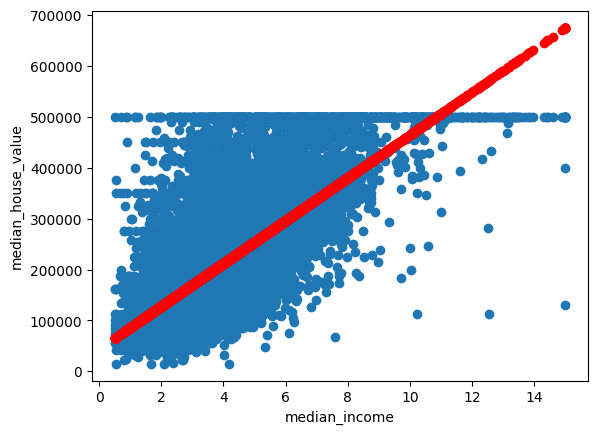

In [ ]:
y_pred = model.predict(X)
plt.plot(X, y, 'o')
plt.xlabel('median_income')
plt.ylabel('median_house_value')
plt.plot(X, y_pred, 'or');

Podemos observar que la linea ajustada del modelo a los datos reales es una linea recta positiva, pero se puede observar que tal vez debido a la gran cantidad de datos y dispersión puede haber un error grande entre los valores predecidos y los valores reales.


7. Ahora vamos a ver que tan bueno es el modelo con datos nuevos. Cargue el archivo 'california_housing_test.csv', genere las matrices de características y destino respectiva, y calcule el score del modelo con estas matrices. ¿El score es similar al obtenido con los datos que se usaron para entrenar el modelo?


In [ ]:
df_test = pd.read_csv('/content/sample_data/california_housing_test.csv')
df_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0
...,...,...,...,...,...,...,...,...,...
2995,-119.86,34.42,23.0,1450.0,642.0,1258.0,607.0,1.1790,225000.0
2996,-118.14,34.06,27.0,5257.0,1082.0,3496.0,1036.0,3.3906,237200.0
2997,-119.70,36.30,10.0,956.0,201.0,693.0,220.0,2.2895,62000.0
2998,-117.12,34.10,40.0,96.0,14.0,46.0,14.0,3.2708,162500.0


In [ ]:
X_nuevo = df_test[['median_income']].copy()
y_nuevo = df_test['median_house_value'].copy()
print(f'Score del modelo: {model.score(X_nuevo, y_nuevo):.3f}')
error = np.sqrt(mean_squared_error(y_nuevo, model.predict(X_nuevo)))
print(f'RMSE: {error:.3f}')

Score del modelo: 0.452
RMSE: 83725.360


Tanto el score como el RMSE genera valores muy parecidos a los anteriores, lo que nos dice que el modelo precisamente no ayuda mucho en predecir el valor de una casa.

8. Ahora haga predicciones sobre los datos nuevos, y en un gráfico de dispersión muestre las predicciones junto con los valores reales de $y$. ¿Qué se observa?

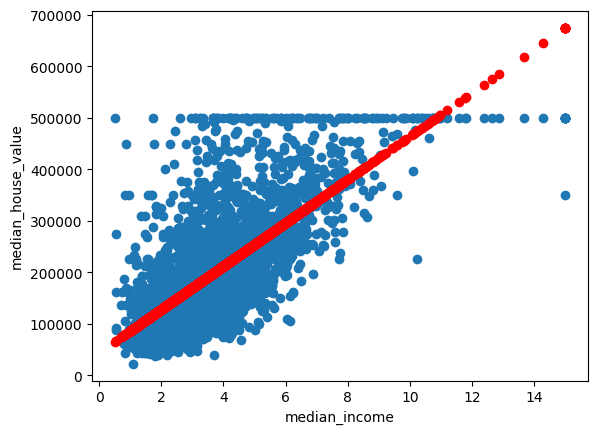

In [ ]:
pred = model.predict(X_nuevo)
plt.plot(X_nuevo, y_nuevo, 'o')
plt.xlabel('median_income')
plt.ylabel('median_house_value')
plt.plot(X_nuevo, pred, 'or');

Las predecciones del modelo se comportan de una manera similar a las predicciones del modelo con los datos anteriores, evidenciandose un error al parecer grande entre el valor predecido y el real, incluso en los valores atípicos. Con lo que se puede concluir que el modelo no es óptimo para predecir el valor de una casa según la variable median_income.